<a href="https://colab.research.google.com/github/HMBinara/ML_Project/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from google.colab import files
uploaded = files.upload()

train_data = pd.read_csv('train.csv')


Saving train.csv to train (4).csv


In [55]:
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,NaN,22.0,1,0,7.2500,NaN,2,0
1,1,1,NaN,38.0,1,0,71.2833,NaN,2,0
2,1,3,NaN,26.0,0,0,7.9250,NaN,1,1
3,1,1,NaN,35.0,1,0,53.1000,NaN,2,0
4,0,3,NaN,35.0,0,0,8.0500,NaN,1,1


In [57]:
train_data.shape

(891, 10)

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         0 non-null      float64
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    0 non-null      float64
 8   FamilySize  891 non-null    int64  
 9   IsAlone     891 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 69.7 KB


In [61]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
count,891.000000,891.000000,0.0,891.000000,891.000000,891.000000,891.000000,0.0,891.000000,891.000000
mean,0.383838,2.308642,NaN,29.392447,0.523008,0.381594,32.204208,NaN,1.904602,0.602694
std,0.486592,0.836071,NaN,13.268389,1.102743,0.806057,49.693429,NaN,1.613459,0.489615
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,7.910400,NaN,1.000000,0.000000
50%,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.454200,NaN,1.000000,1.000000
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,2.000000,1.000000
max,1.000000,3.000000,NaN,80.000000,8.000000,6.000000,512.329200,NaN,11.000000,1.000000


In [62]:
train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,891
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,891
FamilySize,0
IsAlone,0


In [85]:
# 1. Fill missing Embarked values with the most common port
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# 2. Fill missing Age values with median based on Title (extracted from Name)
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',
                                         'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

train_data['Age'] = train_data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

# 3. Drop the Cabin column (too many missing)
train_data.drop('Cabin', axis=1, inplace=True)


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-42486198.py:5: SyntaxWarning: invalid escape sequence '\.'
  train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [86]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [87]:
# Create FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Create IsAlone feature
train_data['IsAlone'] = 1
train_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0

# Convert Sex to numeric (Male=0, Female=1)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Convert Embarked to numeric
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    float64
 11  Title        891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 97.6+ KB


In [89]:
features_drop = ['PassengerId', 'Name', 'Ticket']
train_data.drop(features_drop, axis=1, inplace=True)
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,0.0,Mr,2,0
1,1,1,1,38.0,1,0,71.2833,1.0,Mrs,2,0
2,1,3,1,26.0,0,0,7.9250,0.0,Miss,1,1
3,1,1,1,35.0,1,0,53.1000,0.0,Mrs,2,0
4,0,3,0,35.0,0,0,8.0500,0.0,Mr,1,1


In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    float64
 8   Title       891 non-null    object 
 9   FamilySize  891 non-null    int64  
 10  IsAlone     891 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 76.7+ KB


In [92]:
# One-hot encode the 'Title' column
train_data = pd.get_dummies(train_data, columns=['Title'], prefix='Title')


print("Train data after one-hot encoding Title:")
display(train_data.head())


Train data after one-hot encoding Title:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,1,0,7.2500,0.0,2,0,False,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,1.0,2,0,False,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,0.0,1,1,False,True,False,False,False
3,1,1,1,35.0,1,0,53.1000,0.0,2,0,False,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,0.0,1,1,False,False,True,False,False


In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Embarked      889 non-null    float64
 8   FamilySize    891 non-null    int64  
 9   IsAlone       891 non-null    int64  
 10  Title_Master  891 non-null    bool   
 11  Title_Miss    891 non-null    bool   
 12  Title_Mr      891 non-null    bool   
 13  Title_Mrs     891 non-null    bool   
 14  Title_Rare    891 non-null    bool   
dtypes: bool(5), float64(3), int64(7)
memory usage: 74.1 KB


In [94]:
x = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [97]:
train_data.groupby('Title_Mr')['Survived'].mean()
train_data.groupby('Title_Miss')['Survived'].mean()


,Survived
Title_Miss,
False,0.300283
True,0.702703


In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression

# Fill the remaining missing values in 'Embarked' with the mode
x_train['Embarked'].fillna(x_train['Embarked'].mode()[0], inplace=True)

model = LogisticRegression()
model.fit(x_train, y_train)

/tmp/ipython-input-2159649911.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Embarked'].fillna(x_train['Embarked'].mode()[0], inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative so

LogisticRegression()

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")


Accuracy: 0.7988826815642458


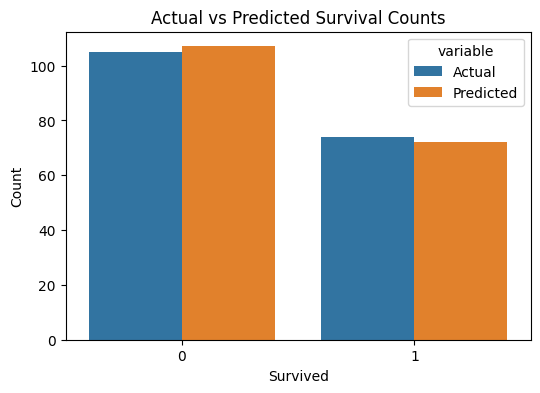

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with actual and predicted values
results = x_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred

# Count of actual vs predicted
count_data = results.melt(id_vars=[], value_vars=['Actual', 'Predicted'])

plt.figure(figsize=(6,4))
sns.countplot(x='value', hue='variable', data=count_data)
plt.title('Actual vs Predicted Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [116]:
import pickle
from google.colab import files

# Save the trained model to a pickle file
filename = 'Survival.pkl'
pickle.dump(model, open(filename, 'wb'))

# Download the pickle file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>